In [ ]:
import numpy as np
import pandas as pd

### PRACTICE ASSIGNMENT

**(Consider the statement for Q1-Q4)**
Load the `iris` dataset from `sklearn`.

Remove the rows if it contain NULL values.

Train the model Using `Kmeans Clustering` by setting the parameter as following:

* `init`: "random"
* `n_init`: 50
* `max_iter`: 500
* `random_state`: 10

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X, y = load_iris(as_frame = True, return_X_y = True)

kmeans = KMeans(init = "random", n_init = 50, max_iter = 500, random_state = 10)
kmeans.fit(X)

KMeans(init='random', max_iter=500, n_init=50, random_state=10)

Q1. Which feature pair has the highest correlation cofficient value?

In [ ]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**function to get inertia**

In [ ]:
def get_inertia(k) :
  from sklearn.datasets import load_iris
  from sklearn.cluster import KMeans
  
  X, y = load_iris(as_frame = True, return_X_y = True)
  kmeans = KMeans(n_clusters = k, random_state = 10)
  kmeans.fit(X)
  return kmeans.inertia_

Q2. Enter the value of the ' inertia_' score Keeping k=5.

In [ ]:
get_inertia(5)

46.446182051282065

Q3. Plot the elbow chart for the given data by taking k=1 to k=12. At which k value elbow is formed?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_(k_init, k_final) :
  from sklearn.datasets import load_iris
  from sklearn.cluster import KMeans

  err = []
  X, y = load_iris(as_frame = True, return_X_y = True)
  for k in range(k_init, k_final + 1) :
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(X)
    err.append(kmeans.inertia_)
  k = [i for i in range(k_init, k_final+1)]
  plt.plot(k, err)
  

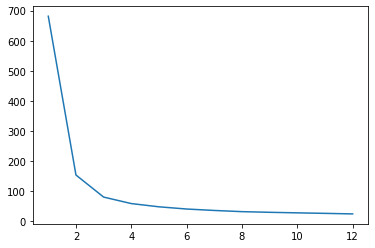

In [ ]:
plot_(1, 12)

Q4. What is the value of ' inertia_' score at k=3.

In [ ]:
get_inertia(3)

78.851441426146

**(Consider the statement for Q5-Q6)**

Load the `iris` dataset from sklearn.

Remove the rows if it contain *NULL* values.

Train the model using **Agglomerative Clustering** by setting the parameter as following
`n_clusters`=3, `affinity`='euclidean', `linkage`='ward'.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

data = load_iris()
X, y = data.data, data.target

ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_pred = ac.fit_predict(X)

Q5. What is the label predicted for last row of samples?

In [ ]:
y_pred[-1]

0

Q6. Enter the number of leaves in the hierarchical tree.

In [ ]:
ac.n_leaves_

150

### GRADED ASSIGNMENT

**Data Set Information:**

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers. Analyze The variability of consumer engagement on Facebook Live data which can help sellers to build selling approach and activities for the company.

**(Consider the statement for Q1- Q8)**

Load the dataset using following link

Url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"

Check if any feature contains *Null* values.

Drop all the features which have *Null* values.

Save 'status_type' as target variable.

Drop the feature "status_id", "status_type" and "status_published" from training set.

Use `LabelEncoder` to transform the target variable.

Use `standard scaler` to scale the features.

For Q4,Q5 Train the model using `Kmeans clustering` (Take `Random state`=10)

For Q6,Q7,Q8 Train the model using **Agglomerative Clustering** by setting the parameter as following

`n_clusters`=4, `affinity`='euclidean', `linkage`='ward'.

**Loading and Preprocessing of data**

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Assignment_files/MLP/Live_20210128.csv")
data1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data1.info() #reference Q2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
data = data1.T.dropna().T
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   object
 4   num_comments      7050 non-null   object
 5   num_shares        7050 non-null   object
 6   num_likes         7050 non-null   object
 7   num_loves         7050 non-null   object
 8   num_wows          7050 non-null   object
 9   num_hahas         7050 non-null   object
 10  num_sads          7050 non-null   object
 11  num_angrys        7050 non-null   object
dtypes: object(12)
memory usage: 661.1+ KB


In [ ]:
X = data[['num_reactions',	 'num_comments',	'num_shares',	'num_likes',	'num_loves',	'num_wows',	'num_hahas',	'num_sads', 'num_angrys']]

In [ ]:
y = data['status_type']
y.head()

0    video
1    photo
2    video
3    photo
4    photo
Name: status_type, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

X[:5],y[:5]

(array([[ 0.64610394,  0.32335035,  1.6868788 ,  0.48272661,  1.98326643,
          0.1961959 ,  0.07671305,  0.47357035, -0.15574803],
        [-0.17319166, -0.25220622, -0.3041444 , -0.14472021, -0.3184544 ,
         -0.147879  , -0.17600986, -0.152587  , -0.15574803],
        [-0.00673846,  0.01308938,  0.12901714, -0.02457082,  0.2069384 ,
         -0.03318737,  0.07671305, -0.152587  , -0.15574803],
        [-0.25749912, -0.25220622, -0.3041444 , -0.23149477, -0.3184544 ,
         -0.147879  , -0.17600986, -0.152587  , -0.15574803],
        [-0.03700268, -0.25220622, -0.3041444 , -0.02457082, -0.09328605,
         -0.147879  , -0.17600986, -0.152587  , -0.15574803]]),
 array([3, 1, 3, 1, 1]))

**Import for Q4 and Q5**

In [ ]:
from sklearn.cluster import KMeans

**Import for Q6 to Q8**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Q1. What is the shape of the data?

In [ ]:
data1.shape

(7050, 16)

Q2. How many feature contain *Null* values?

Ans : 4 (check reference above)

Q3. Column 'status_type' has _ _ _ _ (number) unique values.

In [ ]:
len(np.unique(y))

4

Q4. Enter the inertia score at k=2.

In [ ]:
kmeans = KMeans(random_state = 10, n_clusters = 2)
kmeans.fit(X).inertia_

48278.09824220544

Q5. How many labels were predicted accurately at k=4?

In [ ]:
from sklearn.metrics import accuracy_score
kmeans = KMeans(random_state = 10, n_clusters = 4)
kmeans.fit(X)
y_pred = kmeans.predict(X)
np.where(y == y_pred)[0].shape[0]

4421

Q6. What is the label predicted for first row of samples?

In [ ]:
aggc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_pred = aggc.fit_predict(X)
y_pred[0]

3

Q7. Enter the number of leaves in the hierarchical tree.

In [ ]:
aggc.n_leaves_

7050

Q8. What is the accuracy of the model(in Percentage)?

In [ ]:
accuracy_score(y, y_pred)*100

28.496453900709216